In [1]:
import nilearn
from nilearn.datasets import fatch_openneuro_dataset
dataset_id = 'ds000228'
dataset = fatch_openneuro_dataset(dataset_id)
print(dataset_id)

ImportError: cannot import name 'fatch_openneuro_dataset' from 'nilearn.datasets' (C:\Users\PC\anaconda3\Lib\site-packages\nilearn\datasets\__init__.py)

In [ ]:
import nibabel as nib
import nilearn
img = nib.load('Downloads/brain_img_4_children/sub-pixar001_task-pixar_bold.nii.gz')

In [ ]:
fuc_filename = 'Downloads/brain_img_4_children/sub-pixar001_task-pixar_bold.nii.gz'

In [ ]:
print(img.header)

In [ ]:
from nilearn.image import mean_img

In [ ]:
mean_pub_speaking = mean_img(fuc_filename)
from nilearn.plotting import plot_epi, show
plot_epi(mean_pub_speaking, colorbar=True, cbar_tick_format="%i")

In [2]:
import os
import glob
import gzip
import io
from PIL import Image
import nibabel as nib
# Set the folder containing your .gz images
folder_path = 'import os'

from PIL import Image

from nilearn.image import mean_img
from nilearn.plotting import plot_epi, show

# Set the folder containing your .gz images
folder_path = 'Downloads/brain_img_4_children'  # Update this path

# Find all .gz files in the folder
gz_files = glob.glob(os.path.join(folder_path, '*.gz'))


# List to hold the opened images (if you need to process them later)
images = []

# Loop through each .gz file and open the image
for gz_file in gz_files:
    print(gz_file)
    #img = nib.load(gz_file)
    #mean_pub_speaking = mean_img(fuc_filename)
    #plot_epi(mean_pub_speaking, colorbar=True, cbar_tick_format="%i")

Downloads/brain_img_4_children\gbbct1.seq.gz
Downloads/brain_img_4_children\sub-pixar001_task-pixar_bold.nii.gz
Downloads/brain_img_4_children\sub-pixar002_task-pixar_bold.nii.gz
Downloads/brain_img_4_children\sub-pixar003_task-pixar_bold.nii.gz
Downloads/brain_img_4_children\sub-pixar004_task-pixar_bold.nii.gz
Downloads/brain_img_4_children\sub-pixar005_task-pixar_bold.nii.gz
Downloads/brain_img_4_children\sub-pixar006_task-pixar_bold.nii.gz
Downloads/brain_img_4_children\sub-pixar007_task-pixar_bold.nii.gz
Downloads/brain_img_4_children\sub-pixar008_task-pixar_bold.nii.gz
Downloads/brain_img_4_children\sub-pixar009_task-pixar_bold.nii.gz
Downloads/brain_img_4_children\sub-pixar010_task-pixar_bold.nii.gz
Downloads/brain_img_4_children\sub-pixar011_task-pixar_bold.nii.gz
Downloads/brain_img_4_children\sub-pixar012_task-pixar_bold.nii.gz
Downloads/brain_img_4_children\sub-pixar013_task-pixar_bold.nii.gz
Downloads/brain_img_4_children\sub-pixar014_task-pixar_bold.nii.gz
Downloads/brain_i

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from nilearn import datasets, input_data, plotting
from nilearn.image import resample_to_img
from nilearn.connectome import ConnectivityMeasure
import networkx as nx
import nibabel as nib

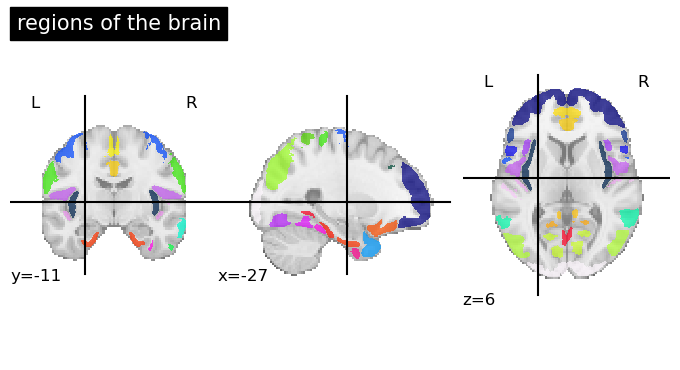

In [5]:
plotting.plot_roi(atlas.filename, title='regions of the brain', cut_coords=(-27,-11,6))
plotting.show()

In [6]:
from nilearn.input_data import NiftiMasker
from nilearn.maskers import NiftiLabelsMasker

# Remove the background label (assumed to be the first element)
fixed_labels = atlas.labels[:48]

# Instantiate the masker with the atlas maps and the fixed label list
masker = NiftiLabelsMasker(
    atlas.maps,
    labels=fixed_labels,
    standardize="zscore_sample",
)

# Fit the masker and generate the report
masker.fit()
#report = masker.generate_report()
#report

NiftiLabelsMasker(labels=['Background', 'Frontal Pole', 'Insular Cortex',
                          'Superior Frontal Gyrus', 'Middle Frontal Gyrus',
                          'Inferior Frontal Gyrus, pars triangularis',
                          'Inferior Frontal Gyrus, pars opercularis',
                          'Precentral Gyrus', 'Temporal Pole',
                          'Superior Temporal Gyrus, anterior division',
                          'Superior Temporal Gyrus, posterior division',
                          'Middle Temporal Gyrus, anterior division',
                          'Mi...
                          'Lateral Occipital Cortex, inferior division',
                          'Intracalcarine Cortex', 'Frontal Medial Cortex',
                          'Juxtapositional Lobule Cortex (formerly '
                          'Supplementary Motor Cortex)',
                          'Subcallosal Cortex', 'Paracingulate Gyrus',
                          'Cingulate Gyrus, anterior division', ...],
                  labels_img=<nibabel.nifti1.Nifti1Image object at 0x0000029B29821BE0>,
                  memory=Memory(location=None), standardize='zscore_sample')

[get_dataset_dir] Dataset found in C:\Users\PC\nilearn_data\fsl

C:\Users\PC\anaconda3\Lib\site-packages\nilearn\image\resampling.py:805: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  return resample_img(


TypeError: Invalid shape (64, 64, 168) for image data

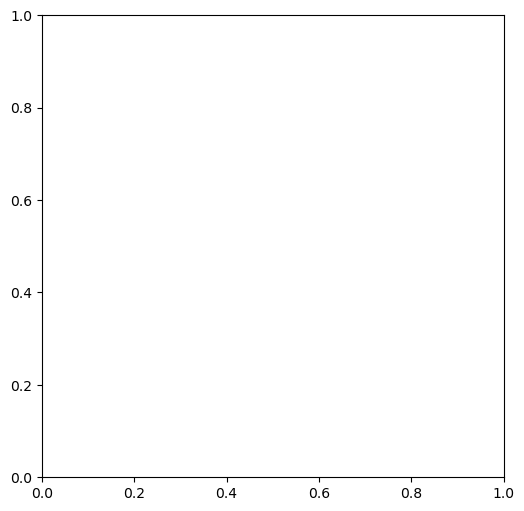

In [11]:
# Load the Harvard-Oxford Atlas
atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr50-1mm')
atlas_img = atlas.maps

folder_path = 'Downloads/brain_img_4_children'

# Get a list of all NIfTI files in the folder
nifti_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.nii.gz')]

# Check if any files were found
if not nifti_files:
    raise FileNotFoundError(f"No NIfTI files found in the folder: {folder_path}")

# Process each image in the folder
for i, file_path in enumerate(nifti_files):
    # Load the brain image
    brain_img = nib.load(file_path)

    # Resample the atlas to match the brain image's dimensions
    mask = resample_to_img(atlas_img, brain_img, force_resample=True)

    # Get the data arrays
    brain_data = brain_img.get_fdata()
    mask_data = mask.get_fdata()

    # Ensure the mask is binary (if not already)
    mask_data = (mask_data > 0).astype(int)

    # Apply the mask to each time point (volume) in the fMRI data
    masked_brain_data = brain_data * mask_data[..., None]  # Add a new axis to mask_data for broadcasting
    
    # Display the masked image (middle slice)
    plt.figure(figsize=(6, 6))
    plt.imshow(masked_brain_data[:, :, masked_brain_data.shape[2] // 2], cmap='gray')
    plt.axis('off')
    plt.title(f'Masked Brain Image {i+1} (Frontal Medial Cortex)')
    plt.show()

In [7]:
from scipy.stats import ttest_ind
from nilearn import image, masking

In [8]:
#load masked dataset using file path
group1_maked_datasets = [nib.load(f'masked_image_[i]_group1.nii.gz')
                         for i in range(15)]
group2_maked_datasets = [nib.load(f'masked_image_[i]_group2.nii.gz')
                         for i in range(15)]

FileNotFoundError: No such file or no access: 'masked_image_[i]_group1.nii.gz'

In [9]:
#extarct roi data for each group
group1_roi_data = []
group2_roi_data = []
for i in range(15):
    group1_roi_data.append(masking.apply_mask(group1_masked_datasets[i].get_data()))
    group2_roi_data.append(masking.apply_mask(group2_masked_datasets[i].get_data()))

NameError: name 'group1_masked_datasets' is not defined

In [10]:
#perfom t-test
t_test, p_val = ttest_ind(group1_roi_data, group2_roi_data)

print(f't-statistic: {t_test}')
print(f'p-val: {p_val}')

t-statistic: nan
p-val: nan
